In [2]:
#Llamar al dataloader
%run DataLoader.ipynb

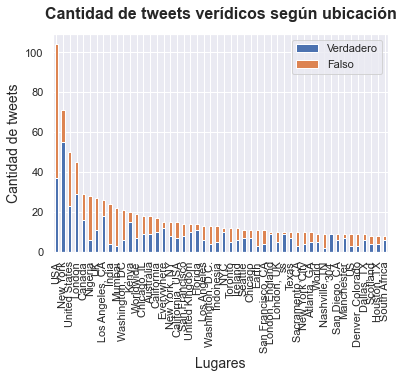

In [3]:
#tweets y su veracidad por ubicación

grupo = dataset.groupby(['location', 'target']).agg({'target': 'count'})
grupo.columns = ['Cantidad']
grupo = grupo.reset_index()
grupo = grupo.pivot_table(index = 'location', columns = 'target', values = 'Cantidad', fill_value = 0)
grupo.columns = ['Verdadero', 'Falso']
grupo['Total'] = grupo.Verdadero + grupo.Falso
grupo = grupo.sort_values(by = 'Total', ascending=False)
grupo = grupo.drop(columns = ['Total']).head(50)

sns.set()
fig, ax = plt.subplots()
grupo.plot.bar(ax = ax, stacked = True)
ax.set_ylabel('Cantidad de tweets',fontsize=14)
plt.xlabel("Lugares",fontsize=14)
ax.set_title('Cantidad de tweets verídicos según ubicación',fontsize=16,fontweight='bold', pad = 15)
plt.show()